# Markowitz Portfolio Optimierung
## Ziel
Das Ziel dieses Projektes ist es eine interakti
ve Form des optimalen Portfolios nach Markowitz zu erstellen. Dabei soll sowohl der Risikofaktor, als auch das Portfolio(bestehend aus DAX30 Aktien) anpassbar sein. 

In [8]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [9]:
df = yf.download('DTE.DE FME.DE AAPL WDP.DE HFG.DE', period="10y")

[*********************100%***********************]  5 of 5 completed


In [10]:
df.head

<bound method NDFrame.head of              Adj Close                                               \
                  AAPL     DTE.DE     FME.DE     HFG.DE      WDP.DE   
Date                                                                  
2010-07-26   32.065430   5.377336  35.412117        NaN   22.498596   
2010-07-27   32.659046   5.414041  37.133247        NaN   22.308357   
2010-07-28   32.273190   5.374714  37.111729        NaN   22.219582   
2010-07-29   31.920740   5.421906  36.315712        NaN   21.999754   
2010-07-30   31.814383   5.406175  36.233952        NaN   21.847567   
...                ...        ...        ...        ...         ...   
2020-07-20  393.429993        NaN        NaN        NaN         NaN   
2020-07-21  388.000000  15.420000  78.139999  42.200001  104.239998   
2020-07-22  389.089996  15.275000  78.540001  43.639999  102.160004   
2020-07-23  371.380005  15.230000  79.000000  45.560001  102.099998   
2020-07-24  370.459991  14.880000  76.419998  4

In [11]:
data =df['Adj Close']
data.describe()

,AAPL,DTE.DE,FME.DE,HFG.DE,WDP.DE
count,2518.000000,2535.000000,2535.000000,685.000000,2326.000000
mean,119.365661,9.496943,59.701139,15.552407,70.659180
std,72.383200,3.267124,14.328208,9.696248,33.406018
min,29.672398,4.441216,35.373398,5.970000,20.351044
25%,66.093098,5.769567,45.838781,9.180000,27.305870
50%,101.109985,10.783264,60.968163,12.100000,81.894855
75%,162.759773,12.226096,72.031715,17.459999,95.330494
max,393.429993,15.420000,87.423950,52.000000,137.682953


In [12]:
corr =data.corr()
corr.style.background_gradient(cmap='coolwarm')

,AAPL,DTE.DE,FME.DE,HFG.DE,WDP.DE
AAPL,1.000000,0.818556,0.668304,0.877462,0.791691
DTE.DE,0.818556,1.000000,0.862030,0.293997,0.954935
FME.DE,0.668304,0.862030,1.000000,0.070060,0.792953
HFG.DE,0.877462,0.293997,0.070060,1.000000,0.082603
WDP.DE,0.791691,0.954935,0.792953,0.082603,1.000000


Text(0, 0.5, 'Returns')

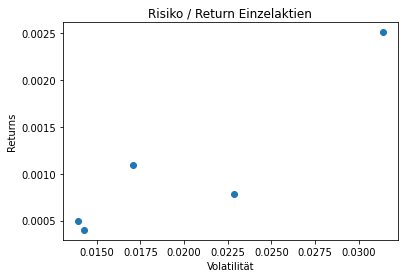

In [19]:
returns = data.pct_change()
cov_returns = returns.cov()
mean_returns = returns.mean()
std_returns = returns.std()

#plotten der Einzelaktien
plt.scatter(std_returns, mean_returns)
plt.title('Risiko / Return Einzelaktien')
plt.xlabel('Volatilität')
plt.ylabel('Returns')

# Generieren zufälliger Portfolios

Wir haben 8 Aktien und müssen entscheiden wie wir Anlegen, dazu ist unser Budget 1. 

In [42]:
from numpy import random
num_portfolios = 20000

def portfolio_performance(weights, mean_returns, cov_returns):
    pf_return = np.dot(weights, mean_returns) * 252
    pf_std = np.sqrt(np.dot( weights, np.dot(cov_returns, np.transpose(weights)))) *np.sqrt(252)
    return weights[0][0], weights[0][1], weights[0][2], weights[0][3], weights[0][4], pf_return[0], pf_std[0][0]

In [50]:
df_portfolios= pd.DataFrame(columns = ['% DTE.DE', '% FME.DE', '% AAPL', '% WDP.DE', '% HFG.DE', 'returns', 'volatility'])
weights = []
for i in range(num_portfolios):
    weights = np.random.dirichlet(np.ones(5), size=1)
    new_line = portfolio_performance(weights, mean_returns, cov_returns)
    #df_portfolios.append(pd.DataFrame((new_line)))
    print(new_line)
df_portfolios.head

(0.0576440872507699, 0.24833026608043915, 0.3002057917897117, 0.30798266380406825, 0.0858371910750111, 0.28856731867262075, 0.21177647390155308)
(0.03695511801477675, 0.022947685937371315, 0.502402735253022, 0.3602657395481952, 0.07742872124663464, 0.3067344299916405, 0.23774024175999495)
(0.20121862426314588, 0.4107701872646025, 0.33204726098486964, 0.009749451588585525, 0.046214475898796493, 0.155143939077645, 0.16776742602218447)
(0.2891723231759964, 0.09728532375860334, 0.3032216684723557, 0.10489067163787044, 0.20543001295517413, 0.22933322075337867, 0.1752611453828042)
(0.056286785557793886, 0.5495397540160375, 0.26106476771333886, 0.00515306016186097, 0.12795563255096878, 0.13849526246411706, 0.17565077226977796)
(0.09548733749566228, 0.08227488893989136, 0.27398917189390637, 0.040898421790470686, 0.5073501798800693, 0.19048965715765653, 0.21881675864259456)
(0.10336398516295692, 0.06304599570874077, 0.3130258875403523, 0.18678845452028642, 0.3337756770676636, 0.2520396962326213

(0.033679738299183734, 0.3077575484751976, 0.3189941959777532, 0.25347873600439297, 0.08608978124347258, 0.25681837337703783, 0.19795077065980696)
(0.44220076076574116, 0.15431741654081332, 0.11394252364913525, 0.0525840928461013, 0.23695520619820892, 0.2326723168108496, 0.18425569418932347)
(0.17779724199782213, 0.17408932717417736, 0.4705482870574711, 0.1690790450446014, 0.008486098725927923, 0.2265777107676834, 0.18414039232001733)
(0.04680988059428182, 0.13683052215592048, 0.034422132730005994, 0.6549782162170296, 0.12695924830276206, 0.4724039126393757, 0.3440269478856503)
(0.12707458901118812, 0.4188416835415835, 0.027346067492310184, 0.3266457496123931, 0.1000919103425251, 0.31590965448875913, 0.22001241909778366)
(0.13139280230271172, 0.06244590559965696, 0.45003519781780854, 0.2924385776046667, 0.06368751667515626, 0.2867882592884364, 0.2125617331594952)
(0.006649854162472034, 0.38734528228353765, 0.5275547440273624, 0.04852108061257019, 0.02992903891405776, 0.1396070385172797

(0.07034990495884519, 0.331858283683268, 0.19200424761098503, 0.13472851009681064, 0.27105905365009114, 0.2186878130060073, 0.18331896753685528)
(0.38762400652058265, 0.06678353016857022, 0.01113181652866282, 0.20705725484656698, 0.32740339193561757, 0.3119570625652247, 0.2156441992623969)
(0.1989827607642136, 0.1643860837818769, 0.10941941292881134, 0.046324814671327666, 0.4808869278537705, 0.21077243659299452, 0.21242354294631058)
(0.036629050512598064, 0.46292232843717196, 0.08537593749612186, 0.024115745695059265, 0.3909569378590487, 0.16870378843678768, 0.20151824392869863)
(0.10006866884458267, 0.3458885426999577, 0.46726073148409314, 0.07614433872665666, 0.010637718244709713, 0.16778137815365202, 0.1747684848362631)
(0.06140984337804549, 0.22891061734316376, 0.1348116081656659, 0.14119737860334766, 0.4336705525097773, 0.2340036454412794, 0.21056150333718715)
(0.6768553136156559, 0.06855458624907386, 0.1974326160222871, 0.0008391277583714091, 0.056318356354611784, 0.2266849763220

(0.41584652439356906, 0.1636732061323899, 0.09583689192392912, 0.03751467744327071, 0.2871287001068412, 0.22515291584903077, 0.18730087547515054)
(0.18101037899095845, 0.15082711111333774, 0.5242930448975288, 0.027407684162043883, 0.11646178083613094, 0.1618573820171674, 0.1714439055492112)
(0.05782881273629585, 0.4440559953836301, 0.029329005993461197, 0.2878361498506754, 0.18095003603593748, 0.2916303111319077, 0.2129244683801105)
(0.12469429170114288, 0.2650611764630465, 0.055955133295074774, 0.3002780279717955, 0.2540113705689404, 0.3129223611454468, 0.2178776695603665)
(0.46945116475255316, 0.019246304976877154, 0.004383501185761242, 0.44253599746569755, 0.0643830316191109, 0.42467219217582963, 0.27688142028901147)
(0.4468831162275033, 0.304542038871034, 0.13240397223509134, 0.0435652722418488, 0.07260560042452262, 0.2161729535396382, 0.177001168547104)
(0.07177472384498541, 0.41995071007701695, 0.24457577389893478, 0.0790372753742447, 0.18466151680481815, 0.18298236964738895, 0.1

(0.0974654595282687, 0.607373526168059, 0.19435346487942076, 0.08999333489258293, 0.010814214531668673, 0.180693594566296, 0.18020824650499684)
(0.17855885546580275, 0.12224162172410717, 0.4944351966617473, 0.010198317001509758, 0.19456600914683309, 0.15922396943054742, 0.17335623347714202)
(0.027055931011693304, 0.3590869937312812, 0.3026135143486677, 0.29993390667170855, 0.011309654236649183, 0.2742424958001163, 0.21285475670776782)
(0.2796322503387287, 0.011086359549511421, 0.24652252181661286, 0.4104641170667742, 0.05229475122837274, 0.373098214277269, 0.2515498047698534)
(0.32508944564175174, 0.3498766341888967, 0.20498394193729505, 0.0895709645201591, 0.03047901371189744, 0.21626360381675655, 0.17153500813007366)
(0.4234678661138939, 0.1210082377783004, 0.036941901372316156, 0.34704106955861397, 0.07154092517687555, 0.3689457514132377, 0.23752906973186383)
(0.49248632438303375, 0.22930683777802102, 0.048502978308543235, 0.20637269495643326, 0.023331164573968614, 0.304097948537980

(0.6847294647121298, 0.11277927237353282, 0.09000439309810819, 0.0719666683335995, 0.0405202014826298, 0.2653159198125185, 0.21129320571842697)
(0.13316215014611577, 0.09793326116982198, 0.05851642528566611, 0.5979858528288523, 0.11240231056954393, 0.4549222898466432, 0.3203331007256214)
(0.5036277175797701, 0.03876346095557806, 0.20151882877030067, 0.06033156399525924, 0.19575842869909185, 0.24087108344804667, 0.18888387937068274)
(0.0648870864988802, 0.2869116964880538, 0.418769873787057, 0.09823996312490817, 0.1311913801011008, 0.18373061832245943, 0.17226723940070413)
(0.12969195729440888, 0.3413197440843562, 0.18072788733924894, 0.31638701612925196, 0.03187339515273388, 0.30251176292655924, 0.2139533669517764)
(0.21662716726124026, 0.4647889498644523, 0.09862748465909939, 0.11094803725916881, 0.10900836095603911, 0.21892497003310288, 0.17306226680929324)
(0.5257899453387622, 0.0019207921503798771, 0.0482193186624304, 0.06584408521509133, 0.358225858633336, 0.26261693549429016, 0.2

(0.05514584073929295, 0.2121236829308836, 0.33918563458747975, 0.046423991983971936, 0.34712084975837193, 0.17377836521979384, 0.1879903137781548)
(0.030171838129908465, 0.01480135547965672, 0.6120237730922811, 0.3141403582587558, 0.028862675039397958, 0.27614491749077985, 0.23049925818381167)
(0.28611068468921436, 0.24131492863959134, 0.2178318084884822, 0.1710232514652825, 0.08371932671742961, 0.2553951168041534, 0.17850907219620193)
(0.37683392123461906, 0.004840276701615361, 0.24128196778438205, 0.2960869813802763, 0.08095685289910738, 0.3319844847303352, 0.21913022162124485)
(0.13999771670874037, 0.21177715728242416, 0.21703261683260744, 0.1844487954449128, 0.24674371373131504, 0.25215217557936725, 0.1865887352881172)
(0.19219212145535652, 0.24315445871033012, 0.09503575398243636, 0.05152762987760939, 0.4180900359742677, 0.20805180038985488, 0.19939180702213083)
(0.2824780640582218, 0.051609556406058396, 0.3866919471936981, 0.037092250395026956, 0.2421281819469947, 0.1946744695295

(0.37412581789678956, 0.011075815401796208, 0.03518179256922964, 0.456934251666531, 0.12268232246565361, 0.4211354813712992, 0.2753374171148077)
(0.29995516839040753, 0.14159669500949942, 0.1889191186323783, 0.03441480364360861, 0.33511421432410593, 0.20740701462782857, 0.18554098647215983)
(0.6667883615995606, 0.08950055250830156, 0.06191962311031648, 0.00558116070113796, 0.17621030208068347, 0.23957551092372023, 0.2088078160535692)
(0.47229507113633773, 0.28263182191258557, 0.0396511907047794, 0.12617943523825392, 0.07924248100804343, 0.2646340050598793, 0.18833959551050497)
(0.1061429401595822, 0.0612635095467778, 0.190887349746568, 0.4891078632512258, 0.15259833729584607, 0.3954398579498141, 0.27731119694235123)
(0.014750570168467493, 0.1966170547386193, 0.16976071723928884, 0.46418490574099447, 0.15468675211262994, 0.36953472583934627, 0.26705543690295486)
(0.03550326158711782, 0.06699531311314186, 0.284270091440493, 0.14306149108772273, 0.4701698427715245, 0.23030044581564124, 0.

(0.036880329671090784, 0.22379820688014795, 0.17646244666901062, 0.5500767637511568, 0.012782253028593978, 0.40585268253131374, 0.2992038112574811)
(0.0988129869013714, 0.4246832264246622, 0.4181497611225122, 0.05571514547280268, 0.0026388800786515936, 0.15774100911136743, 0.1745053904049371)
(0.21786379604870335, 0.012051530654976779, 0.542024032956795, 0.14894425296365527, 0.07911638737586958, 0.2260364960779768, 0.18604820237086292)
(0.30697647066469236, 0.00691421837385063, 0.23360041736697673, 0.0075267139633249745, 0.4449821796311552, 0.20194346672355248, 0.20835337446498708)
(0.2687817056196184, 0.050070517800013, 0.20965752636577523, 0.41780544128966507, 0.053684808924928315, 0.37612947725863105, 0.25257943374083336)
(0.1339688363670516, 0.3244696438492242, 0.08552656343700249, 0.015696183851363333, 0.4403387724953585, 0.182871150052201, 0.20474242311271584)
(0.05069413280200748, 0.3099337293094435, 0.0112186567367184, 0.15335623846700042, 0.4747972426848301, 0.2444425896815683

(0.02168689421174026, 0.20523115224484323, 0.5179052775404825, 0.14247024797402114, 0.11270642802891302, 0.19600138305441883, 0.18329515982780992)
(0.1952374735313112, 0.15724321263778374, 0.1850999014895978, 0.05295532337914331, 0.40946408896216396, 0.20653444477797622, 0.196578963632752)
(0.1911574707877935, 0.6378816333978206, 0.07346921625802841, 0.011214328498524752, 0.08627735105783282, 0.16326355160818626, 0.17899004327514667)
(0.10048379302321375, 0.07719869419778964, 0.37727815054925323, 0.3104297892889417, 0.13460957294080172, 0.29817144292494224, 0.21591806937444558)
(0.2363655391372804, 0.1793545114345389, 0.10151722869446594, 0.02623825301133626, 0.4565244677223784, 0.20461414920281265, 0.20730631922581697)
(0.008142621278791085, 0.18455398953781757, 0.4113414496399597, 0.271985734129029, 0.12397620541440264, 0.26304114885313185, 0.20645912962756954)
(0.323024866517261, 0.27562113427498286, 0.12167530179578476, 0.0718649215560264, 0.20781377585594507, 0.22203050154185525, 

(0.08225957251513319, 0.20066078395664888, 0.476644819698603, 0.08296278515980217, 0.1574720386698128, 0.1792300533089756, 0.1734537600647369)
(0.01822839303681405, 0.041429670883115235, 0.49385458276665983, 0.23919579252569675, 0.20729156078771413, 0.2522047591247062, 0.20706878007367238)
(0.02215946294338521, 0.14298724587552586, 0.0836836622123472, 0.5718146381890892, 0.1793549907796526, 0.42915996290267283, 0.31097959391104574)
(0.04357207666432342, 0.05295806756335449, 0.514635715626791, 0.38137903512555854, 0.007455105019972461, 0.31299213301648837, 0.24579782338144646)
(0.34229763329780244, 0.3840842543761862, 0.20716139974774428, 0.01755987688800513, 0.04889683569026199, 0.18360031540056962, 0.1699559202089271)
(0.2777766546148017, 0.07763686747341965, 0.13636739903813586, 0.09055564918231389, 0.41766342969132886, 0.23990296174392214, 0.20410913893369817)
(0.1911405214828843, 0.23030367880051608, 0.27157606769390896, 0.21106495066026687, 0.09591478136242383, 0.26099416119225877

(0.1236066167934429, 0.1350704502866211, 0.12843478765462527, 0.3278283132992201, 0.28505983196609075, 0.3274014604000123, 0.22881880619248202)
(0.0424879866904752, 0.48588380324034575, 0.060234268895370514, 0.16247533843998826, 0.2489186027338204, 0.22993374883478018, 0.19213781863501195)
(0.07281663380771958, 0.024377656782402453, 0.609194470443562, 0.20046879193246417, 0.0931424470338518, 0.22969402783839696, 0.19968155741682214)
(0.24014550266463194, 0.12387175012854808, 0.3664059991553028, 0.012520748974310188, 0.2570559990772071, 0.17733254519180724, 0.17457995638278356)
(0.2689775414853682, 0.3343631072121411, 0.15253875148302343, 0.09400885916334219, 0.15011174065612506, 0.2200832908327144, 0.16928580296074033)
(0.02442070630024883, 0.4079181024861507, 0.034894079729256004, 0.3428585003932795, 0.189908611091065, 0.3150554957943942, 0.2294788587147268)
(0.31767681029065037, 0.2751593195200156, 0.048208271538699735, 0.057016681573094474, 0.3019389170775396, 0.22234652581762232, 0

(0.034849328671927325, 0.27236386117760103, 0.06670154320615772, 0.3289532030987145, 0.29713206384559926, 0.3168057242033414, 0.23199028805205013)
(0.3665839855197986, 0.10507145990466757, 0.434203371921137, 0.03661965649918076, 0.05752152615521609, 0.19240953426766116, 0.17465286934586102)
(0.6259874825902793, 0.10829553843584466, 0.08170496825125081, 0.148942974382395, 0.035069036340230064, 0.2952980976881207, 0.21151426147010732)
(0.5429026941398031, 0.052614033604478895, 0.0776033744926869, 0.24509723998950797, 0.08178265777352314, 0.33510658206890553, 0.2206967105478122)
(0.345421325902363, 0.34483929808851366, 0.07287291619520342, 0.2179556732548041, 0.01891078655911576, 0.2867631638206391, 0.19548883675207454)
(0.03734020131394249, 0.05325866448691917, 0.01658148077236199, 0.3641785510248814, 0.528641102401895, 0.35342483176746253, 0.2819367705389214)
(0.2697309809401418, 0.14249799444518024, 0.3897398251889786, 0.06100706486633562, 0.13702413455936371, 0.1970170293580406, 0.168

(0.11068496798770606, 0.7122853595188748, 0.09791350150115825, 0.046342001875299424, 0.03277416911696137, 0.16436026810130802, 0.18553554760496888)
(0.37044210373123443, 0.007079482994568339, 0.09839266975526827, 0.2993630373443473, 0.2247227061745816, 0.34663007500644955, 0.22607105196401006)
(0.010027483381142975, 0.344983521213652, 0.2596726701810447, 0.2676704939564292, 0.11764583126773111, 0.26414159977831675, 0.20248764927163315)
(0.1071213580561012, 0.2710505577850698, 0.3230466610300712, 0.059775918971271845, 0.23900550415748595, 0.1807984861097704, 0.17223068981086753)
(0.39886403591344677, 0.22487935698081546, 0.22897328559196567, 0.10657005141044387, 0.04071327010332826, 0.23631589643835352, 0.17683792576630394)
(0.020714674978353866, 0.27906742615788144, 0.5800094084044587, 0.09061651450590388, 0.02959197595340236, 0.16190728584349057, 0.18346799403573458)
(0.15793087012271717, 0.19911647739867627, 0.46281551905976137, 0.14963278284186307, 0.030504350576982097, 0.2154908560

(0.6156341876611715, 0.13056075663739955, 0.08745552367926168, 0.16606745733148853, 0.00028207469067865505, 0.2997130517145428, 0.2136494703024973)
(0.03162314423826375, 0.2776282579866682, 0.13732733927720045, 0.35975928904482446, 0.19366196945304312, 0.3226681871462515, 0.23170269513169986)
(0.2263092247757047, 0.027042775068324414, 0.2339490019763141, 0.14871529228903116, 0.3639837058906257, 0.2554189709022736, 0.20023393165957948)
(0.3016106842976882, 0.037670105822305656, 0.14394070737291648, 0.16727359846353632, 0.34950490404355333, 0.2772739189784307, 0.2038065475863774)
(0.044579072011624164, 0.07713389436861658, 0.6759728712529793, 0.1832330605076236, 0.01908110185915619, 0.2096164203426663, 0.20254711867327166)
(0.36179355646488337, 0.2956445447538103, 0.06843052599344326, 0.08764705583087247, 0.18648431695699066, 0.23557506188360508, 0.1768977135840812)
(0.2765547038939395, 0.5690336968179555, 0.11277016115404954, 0.011990538470428259, 0.029650899663627127, 0.171520947231120

(0.2101886454530205, 0.23120946699833464, 0.3375961685811969, 0.1445330971191954, 0.07647262184825247, 0.22711969136993518, 0.17304020488980182)
(0.022022315883445994, 0.004792581423248817, 0.313305885610739, 0.585062042943164, 0.07481717413940235, 0.42284417331947594, 0.31689238039599754)
(0.22153254651429025, 0.18504474418483421, 0.06518494310050803, 0.5138492437121484, 0.014388522488219129, 0.41815536669475817, 0.28696347569472297)
(0.08899319568206653, 0.40136006453120615, 0.26136593440671196, 0.026856330366870046, 0.2214244750131454, 0.16142508831271785, 0.1723706538907018)
(0.10705048671470171, 0.413395886296464, 0.33897246834113126, 0.09747859700857575, 0.0431025616391274, 0.1850351247693595, 0.1715338774624962)
(0.24253165412170669, 0.5602872038995147, 0.0855506836501188, 0.009125097032342136, 0.10250536129631774, 0.17093185083730728, 0.1745183980055545)
(0.050142678020337006, 0.4961691904783931, 0.3168570654049772, 0.05233608546691023, 0.08449498062938247, 0.1570331428542153, 

(0.28495478828026133, 0.108558360205628, 0.2825677637321422, 0.16279996542506958, 0.16111912235689874, 0.2553039981065898, 0.18036601279418024)
(0.10817382723131838, 0.2014583479598254, 0.25338417865270035, 0.04221437283652095, 0.3947692733196349, 0.18519754121632723, 0.1936421216504369)
(0.3023687827683413, 0.047806415833722145, 0.09580323523653825, 0.4719901988999083, 0.0820313672614901, 0.413480755105628, 0.2747323296149612)
(0.1521017275437778, 0.033049119852234285, 0.3267521172020145, 0.01348720003062664, 0.47460983537134677, 0.18151682806078703, 0.2119174130658706)
(0.039688180672587225, 0.08908148966068025, 0.048065081774050895, 0.6344663164336102, 0.18869893145907146, 0.4651705125781972, 0.3380273423169162)
(0.09601854362877552, 0.24440618937087644, 0.27311562513558635, 0.31439246914178176, 0.07206717272297991, 0.2972509263762532, 0.212696552441204)
(0.4049800514758337, 0.1510990753183793, 0.09778907969771256, 0.09755184210355547, 0.24857995140451902, 0.25110489229605615, 0.185

(0.040901484866267046, 0.09722700874281025, 0.3690678543431563, 0.26069286737248615, 0.2321107846752802, 0.27127618632884815, 0.2078898964118346)
(0.35821434257085855, 0.20212001869150958, 0.23527520866497237, 0.005772770831451997, 0.19861765924120758, 0.19050079979626935, 0.17194521497529422)
(0.20589747626401392, 0.14439085119619396, 0.1381249518530172, 0.07259516673721372, 0.4389915539495613, 0.22140339603281897, 0.20430549168085047)
(0.23152877417687415, 0.22332700511640796, 0.038338788280221824, 0.2022409103089321, 0.304564522117564, 0.28348441504208344, 0.20081440145126156)
(0.13156886103992027, 0.3478773157570123, 0.3323283068684322, 0.02753771376546129, 0.16068780256917398, 0.16210011097850424, 0.16667842496261226)
(0.2714866067505382, 0.2969156361120012, 0.3106225393031267, 0.10374720646109607, 0.017228011373237786, 0.21192137744806008, 0.17110172997804193)
(0.16490679759699708, 0.306132737081389, 0.01372553415173908, 0.36635833974348164, 0.14887659142639306, 0.345770896991758

(0.2977866605643365, 0.38930806376307625, 0.12566145871810375, 0.09488495666160747, 0.092358860292876, 0.22123125925061604, 0.17094415986537867)
(0.05566635180204394, 0.021907079455338277, 0.2744601270271622, 0.48681904992778047, 0.16114739178767504, 0.38532993036698265, 0.27829647862296375)
(0.015069148476727634, 0.03216131142239102, 0.2548350352681807, 0.14614141114292808, 0.5517930936897726, 0.23549826140696448, 0.24009933822692747)
(0.13489369265201878, 0.02005757194703525, 0.4586992110001239, 0.17962116571012346, 0.2067283586906986, 0.2404118745849884, 0.19056030742164504)
(0.15538376155619313, 0.19266625630679868, 0.26449246400591614, 0.0699004219576565, 0.31755709617343575, 0.20044828947929305, 0.18100107472858043)
(0.207671511769006, 0.15122973504482579, 0.04378913438848974, 0.5231016694505882, 0.0742079493470903, 0.4256847371985028, 0.29027375683471496)
(0.12156676833652864, 0.3729056666418933, 0.38308986177266147, 0.09159124274907099, 0.030846460499845466, 0.18232628688876104

(0.2176569227729122, 0.11501755310450856, 0.11569705161885749, 0.4555578453355375, 0.09607062716818429, 0.39285187165728114, 0.26400447761180196)
(0.5893861093485822, 0.08027215499627996, 0.2742638031192986, 0.011899781175095261, 0.04417815136074396, 0.2163592921876554, 0.1944741413515777)
(0.015128706367341649, 0.14140616854080595, 0.42398756844530733, 0.1453409518106879, 0.2741366048358572, 0.2106046800474663, 0.19060450959018443)
(0.3905823112505492, 0.07114483353983898, 0.2149594791841327, 0.2228508615317295, 0.10046251449374952, 0.298907415056257, 0.19851780827333868)
(0.10181512554199676, 0.2982787147586803, 0.019974319484063436, 0.36347017572852947, 0.2164616644867301, 0.33959716093202436, 0.23537877141674596)
(0.09179985760394219, 0.1615328544659597, 0.0038920181182213374, 0.529085031730227, 0.21369023808164989, 0.4224006609531742, 0.2962439866236666)
(0.25226607806177803, 0.03368490953980279, 0.03407343427901437, 0.6390644757946998, 0.040911102324704976, 0.48913688496095453, 0

(0.023727269668812653, 0.4165063511579349, 0.027728051431386104, 0.34020854855847765, 0.19182977918338873, 0.3139104929842139, 0.22914380372915003)
(0.5012154243303318, 0.03090992063717146, 0.2678665751865156, 0.026837319923166937, 0.17317075992281422, 0.22028537354373998, 0.1861861819840774)
(0.2646151416919758, 0.1307749633697969, 0.44659413411155047, 0.10835688659472563, 0.04965887423195099, 0.21251127373097797, 0.17460018659059923)
(0.09546060404926998, 0.45476783341569277, 0.13382167284173088, 0.25945910383734916, 0.056490785855957286, 0.2712871799230541, 0.20029356875879703)
(0.09733110925388525, 0.2495216387332874, 0.2868789898943118, 0.2637310126223473, 0.10253724949616823, 0.27365236701780676, 0.1981778059488044)
(0.09844193218700918, 0.13788538087177096, 0.3252062068967067, 0.4065055852674965, 0.03196089477701667, 0.3402562719352961, 0.245571417700939)
(0.14558799564140706, 0.2936096901056147, 0.2851439050335716, 0.12965373435765737, 0.14600467486174906, 0.2161135156485525, 0

(0.18054468199816298, 0.2489465417766506, 0.003143959647225509, 0.32819187498362495, 0.23917294159433594, 0.3356981455284888, 0.22656725058757823)
(0.2897901799615926, 0.6371243620115702, 0.008533813512612315, 0.03200853240962485, 0.03254311210460005, 0.18630812956605108, 0.18367557945989627)
(0.023394928439830237, 0.2481492705080825, 0.01764223358056744, 0.3065392977803354, 0.4042742696911844, 0.3127567440420353, 0.24200690019709045)
(0.17545431926754126, 0.15200319949756017, 0.15457274420293232, 0.39615202171754244, 0.12181771531442397, 0.357274756844942, 0.24086907826756218)
(0.7831238021575418, 0.017295089049316408, 0.006959099726003698, 0.0754649158078874, 0.11715709325925062, 0.28963101136370323, 0.23160358273179235)
(0.6961996004416385, 0.015078957961186027, 0.21753455197076382, 0.002349869636151661, 0.06883701999025978, 0.23085915395031317, 0.21096909555453677)
(0.0660046351389098, 0.07883312343754686, 0.7736787069179052, 0.006825864329770663, 0.07465767017586743, 0.12511115066

(0.25014082652488157, 0.012366721399208185, 0.021714386811872422, 0.5309249764971864, 0.18485308876685158, 0.4448321847040096, 0.3002829745821783)
(0.05756614555961082, 0.18996602656651235, 0.0029105966997671697, 0.37009751218451126, 0.37945971898959846, 0.34874003590208924, 0.2563595108972006)
(0.22010551448553073, 0.2768371138663821, 0.09776600738834121, 0.07990032972059004, 0.32539103453915597, 0.21976309532427968, 0.1848114172622029)
(0.005879051061530455, 0.028113422514933116, 0.045406068503304205, 0.08988497027388546, 0.8307164876463466, 0.23102772313646724, 0.3121706313610547)
(0.035792294256878986, 0.13011237333985462, 0.12377794832574386, 0.36706178999340067, 0.34325559408412193, 0.338431247385973, 0.2491854067830923)
(0.1265235501821291, 0.1369409106366464, 0.3675935830114552, 0.1640773795783, 0.20486457659146923, 0.2331920609451411, 0.18182005902781725)
(0.18129204975687285, 0.17839793816831018, 0.1076249356133393, 0.21077321677124408, 0.3219118596902335, 0.27989082034576024

(0.41160216217477363, 0.16271422230354726, 0.17137773690095048, 0.172793196852192, 0.0815126817685367, 0.27625348270733296, 0.1878273816749091)
(0.2117176243364326, 0.12597411701822253, 0.058353018936295895, 0.5568512758333746, 0.047103963875674434, 0.4411034090464397, 0.30411171160199424)
(0.12038517701510447, 0.06837592468763873, 0.13229546618838198, 0.36102546467849295, 0.3179179674303819, 0.3461336689019398, 0.24413517223560455)
(0.08311588620105857, 0.18300127190197513, 0.16488632922928842, 0.007084485413808544, 0.5619120272538694, 0.17798030946804239, 0.23137311280415443)
(0.04496331008373407, 0.3472128141906881, 0.04027538632154214, 0.23176719204537638, 0.3357812973586594, 0.27242985943276316, 0.2127311116043203)
(0.06538780561389604, 0.055084340357685925, 0.2529281648704828, 0.4539925062878942, 0.17260718287004106, 0.3714692151103794, 0.2652981569335611)
(0.20268264685493517, 0.04668198477870188, 0.02411476141641786, 0.3096181226317108, 0.41690248431823423, 0.3423382023311536, 

(0.20197047852894187, 0.011296207857369525, 0.1419700797548483, 0.5512097202784828, 0.09355351358035746, 0.438288422512418, 0.30306770111096587)
(0.05161321243032145, 0.14891259411238925, 0.0036773423362060492, 0.11120363953536236, 0.6845932115857208, 0.2389128445594959, 0.27092489662290725)
(0.20925720580254656, 0.20410602230861558, 0.32035298920016547, 0.25869957566551705, 0.0075842070231553595, 0.2802748460834873, 0.19958563021905626)
(0.5519604199779543, 0.06958518184936906, 0.12256215158131323, 0.006894919910882555, 0.24899732668048086, 0.22681940329863995, 0.19753182715681514)
(0.10560804215948925, 0.4964071748936611, 0.023267796254073644, 0.3049659664558813, 0.06975102023689461, 0.29947296967209297, 0.21582725609963077)
(0.10482769856297004, 0.14982915708430705, 0.14282245342326774, 0.34491557564490294, 0.25760511528455216, 0.33086439437711773, 0.23111632162222082)
(0.09467747775959443, 0.27493753413464883, 0.08786925205077713, 0.31262083449061057, 0.22989490156436893, 0.3121137

(0.20641717196788514, 0.5476109519821295, 0.13874672168475052, 0.0634314998025536, 0.04379365456268115, 0.18746524217833832, 0.17328099694247584)
(0.3235194665704504, 0.16948262669909525, 0.34931179536982027, 0.07880006250406205, 0.0788860488565721, 0.21083732143113273, 0.16996928216116336)
(0.12212341233736644, 0.3031418869330323, 0.040676227930437125, 0.26982797603300673, 0.2642304967661575, 0.2981670612659554, 0.21106788845335445)
(0.6578168852969521, 0.12730876312059938, 0.16419967621015982, 0.014856642147953845, 0.03581803322433476, 0.23015669347652215, 0.20375229873908687)
(0.11670134955197312, 0.362433787702877, 0.12975894330936374, 0.0827710887209408, 0.30833483071484546, 0.20351846012046862, 0.18316840219251948)
(0.29342421740099217, 0.3499808833698565, 0.11412464407974833, 0.06736487110846787, 0.1751053840409351, 0.212992671485601, 0.17051002882601415)
(0.04088289524834451, 0.20935808911162657, 0.37395009457425055, 0.24055621219455064, 0.1352527088712277, 0.2537361052875982, 

(0.00046608189245400894, 0.18438309749581772, 0.1343534654757824, 0.6380933351390665, 0.04270401999687926, 0.4482378623040226, 0.3355358112155778)
(0.06420869305576413, 0.5046868187262176, 0.19221361937056475, 0.02996778635177784, 0.20892308249567582, 0.15989944304241832, 0.17625636199147646)
(0.4427352554442906, 0.02091853289665313, 0.3290507460390422, 0.04338923001347542, 0.1639062356065386, 0.21772490123611118, 0.18125811338892728)
(0.30697292895831335, 0.4054811520942483, 0.0759122592863014, 0.04441051509914892, 0.16722314456198806, 0.2036761394959185, 0.17208520344180248)
(0.05870904104812462, 0.016038527779400697, 0.324564766736297, 0.3440846103234419, 0.2566030541127357, 0.3191972445075383, 0.2346918617743123)
(0.27486650799114354, 0.24485896199943008, 0.36283808650263294, 0.0033521076403999032, 0.11408433586639367, 0.16741136930178324, 0.16606500051800072)
(0.5007640466276542, 0.16292446573789504, 0.012584898089799342, 0.31587377443812353, 0.007852815106527753, 0.36067500217494

(0.26990227126599375, 0.03957491104382552, 0.021703881446385354, 0.25625100703259224, 0.4125679292112032, 0.3251600065908696, 0.23398059176428784)
(0.15146931312072417, 0.3173174644392238, 0.04112372806158927, 0.20465763167825357, 0.28543186270020937, 0.2710697290664548, 0.19813409001799018)
(0.5356173805684958, 0.4273320643763769, 0.0012526110042004944, 0.03534687670478254, 0.0004510673461442904, 0.22312103405179837, 0.19494006761427674)
(0.33379898086749377, 0.2623114597843402, 0.14896707227294384, 0.07065722723429163, 0.18426525984093056, 0.22067866221614993, 0.1716307288939265)
(0.41948737458536883, 0.025596188418683066, 0.11600808167892789, 0.35190906957172485, 0.08699928574529554, 0.3701502590068648, 0.23956632604518893)
(0.4048091177849168, 0.14929807889931468, 0.006927660639334448, 0.0020066163202752734, 0.43695852635615884, 0.21859656572459876, 0.21373390001053275)
(0.0051448441615840135, 0.3189226357283364, 0.1336027466697891, 0.02823769280701289, 0.5140920806332776, 0.174055

(0.3041522141879354, 0.10615628749540934, 0.0033676692138989344, 0.285911685, 0.3004121441027562, 0.33752629978460696, 0.22570980232833454)
(0.024962608693372215, 0.3746732409942193, 0.3498584933019289, 0.20806138233942933, 0.042444274671050074, 0.22846595147505344, 0.19020470903369435)
(0.24682206273614438, 0.032760904322219536, 0.1822189566198828, 0.34693772313729376, 0.19126035318445944, 0.34762623095143225, 0.2307248324190441)
(0.3046934840524575, 0.1154677603807092, 0.18298508215361847, 0.2900486368434361, 0.10680503656977862, 0.3212162536456753, 0.21026384640252488)
(0.14002139616114698, 0.1299756367285957, 0.45476845912572833, 0.11868578327573044, 0.1565487247087985, 0.2065886170619368, 0.175225673507929)
(0.20224579182905267, 0.49597399434434275, 0.1965663060956261, 0.007307929732861862, 0.09790597799811662, 0.16100369995417, 0.16909952441630877)
(0.08045489220787565, 0.10242217748786106, 0.13876946338619214, 0.10405261246597765, 0.5743008544520936, 0.22837182254818145, 0.23874

(0.010470192248119245, 0.5918884417692151, 0.01390756421463828, 0.15326331464988524, 0.23047048711814222, 0.2200822309540593, 0.19669339971535976)
(0.0006599731616784326, 0.3462372050765638, 0.5577653079778696, 0.04017058350757757, 0.055166930276310464, 0.13563532826751107, 0.18143549729389452)
(0.0255863189086497, 0.14561825537805712, 0.20786425169979106, 0.06062655399435246, 0.5603046200191497, 0.19534771660960865, 0.2332954551852951)
(0.5250044199913516, 0.2169770492784443, 0.08711537352560374, 0.012520848258474434, 0.158382308946126, 0.2196685862945276, 0.18683216329503927)
(0.31566109507426715, 0.167582945015999, 0.11678109191365066, 0.28717528490316746, 0.11279958309291561, 0.3233846181884372, 0.2099068303409663)
(0.13819822792823913, 0.2296996379266307, 0.052120959081782936, 0.4046988018291204, 0.17528237323422685, 0.362279062108918, 0.24615359090447514)
(0.0706121256340626, 0.0716879925818877, 0.0510273008979105, 0.3048480695095713, 0.5018245113765679, 0.32554630339282625, 0.25

(0.0031299372088672735, 0.5075209339457046, 0.07686000943101173, 0.04036681895822252, 0.37212230045619393, 0.17067149740928814, 0.20181849541685146)
(0.6289520068464427, 0.04678082782070957, 0.07675447174971523, 0.13291609068409205, 0.1145966028990405, 0.2936227660400496, 0.2106260634724259)
(0.003941581426544418, 0.14321651421552606, 0.06195236457424407, 0.2857172504896578, 0.5051722892940278, 0.3056976739582263, 0.255365834538481)
(0.2808657521515166, 0.1932849664555575, 0.025892282719924636, 0.05018503694728231, 0.4497719617257188, 0.22477373624973815, 0.20960604145494738)
(0.03553888521454877, 0.4880095541165561, 0.040172628307891464, 0.026747753329319272, 0.40953117903168457, 0.17229135313389024, 0.20707623498744487)
(0.3288935174060128, 0.5568557147340109, 0.03129544489738061, 0.07135440873409937, 0.011600914228496111, 0.21016427076918465, 0.1819190605663208)
(0.04966027913394112, 0.24860641597531785, 0.07067783267240617, 0.07769231044377042, 0.5533631617745643, 0.210305831370088

(0.3085130355519309, 0.2211377633231153, 0.34220883441748157, 0.11838247638360722, 0.009757890323865072, 0.22370283740538674, 0.17513575008227206)
(0.12610690602026736, 0.20552766064672273, 0.14351513527254323, 0.25832585630430205, 0.26652444175616447, 0.290739548936765, 0.20616848061197396)
(0.16251067693899784, 0.3827773481840092, 0.2589492709090443, 0.17491359310772134, 0.020849110860227345, 0.23299038292297133, 0.17996780639338023)
(0.010063842664613706, 0.26917505976285855, 0.3277573110542246, 0.2166891312379088, 0.1763146552803944, 0.24103522650319828, 0.19242474087277436)
(0.32723828161381324, 0.30504128328387525, 0.04284126718794279, 0.11058356364393118, 0.21429560427043756, 0.24463495176869018, 0.18001502814493983)
(0.11183173191089134, 0.40047638921024253, 0.10973903820871352, 0.209612027159723, 0.16834081351042965, 0.25730000203675096, 0.18891958535586847)
(0.059177569150525224, 0.26239438114168706, 0.06575046851715417, 0.43609754651671484, 0.17658003467391886, 0.36601857645

(0.40246306790179276, 0.11148825012689664, 0.2339043020864421, 0.09994165406452553, 0.15220272582034303, 0.24165985026308792, 0.177998703359279)
(0.039322192538707085, 0.22922792493631886, 0.08155158418368691, 0.4180547440812429, 0.23184355426004427, 0.35757573672864906, 0.25459601917197716)
(0.6954197237842015, 0.02916925225700623, 0.03765110421957406, 0.20853741928928005, 0.02922250044993813, 0.33670275843678055, 0.23515223993641307)
(0.2862583310804603, 0.226434303696923, 0.04886551464637247, 0.0437994909741067, 0.39464235960213756, 0.21772727044496956, 0.1978556556668098)
(0.0051244955571714355, 0.4329940198344667, 0.39225039028536046, 0.06543188052858724, 0.10419921379441421, 0.1565861203707857, 0.17544515041332165)
(0.09802639973606705, 0.3700456345858292, 0.12734745580031906, 0.38080054927740814, 0.023779960600376585, 0.33105912610271787, 0.23588581108451998)
(0.3990635895760033, 0.29351036954492077, 0.035057618285894314, 0.1421288578524496, 0.13023956474073203, 0.26551000884217

(0.09866720822445128, 0.02302893834765284, 0.2908129683420595, 0.5444672069312511, 0.043023678154585375, 0.4120093126222058, 0.299450174922613)
(0.19869846331575455, 0.1093318500939515, 0.2799823679701904, 0.3724411064004863, 0.039546212219617294, 0.33977103718819074, 0.2339218296771717)
(0.11094169266259557, 0.1975080954610808, 0.22164609144355638, 0.12711363792997687, 0.34279048250279043, 0.22562954812023933, 0.1905470878461405)
(0.11542699294803137, 0.2074782695249757, 0.34124311022455744, 0.1543048176678829, 0.1815468096345526, 0.22541331297117828, 0.17742509437809922)
(0.04037983410111598, 0.006876558195385231, 0.9007955463000034, 0.02999868342385842, 0.021949377979636992, 0.12616727905786734, 0.2116316472257233)
(0.07016051539039955, 0.031834156566592754, 0.18325445605530036, 0.1934219872662695, 0.5213288847214378, 0.2672704837989777, 0.23851486746505446)
(0.17166710793358314, 0.2453871627306373, 0.007292483026334084, 0.5270517050144636, 0.048601541294981856, 0.4211595246811741, 

(0.20667354317664993, 0.11796877656578902, 0.2767504506674374, 0.3911296894283239, 0.007477540161799761, 0.34817205360382414, 0.24132609907551233)
(0.14511465521204114, 0.0193092980576017, 0.45869796068205587, 0.1990854060890229, 0.17779267995927842, 0.24970671154014948, 0.19260727890539017)
(0.21875614084513625, 0.20230998293770855, 0.07252899328228297, 0.133442388287724, 0.37296249464714826, 0.2508780668226093, 0.1985623264034839)
(0.054329964969050626, 0.2027620761948228, 0.27113120617522973, 0.13409172025538355, 0.33768503240551334, 0.2190646865890953, 0.1922807247777525)
(0.3751885931736239, 0.006315482745381023, 0.05537774775653247, 0.4845141459031612, 0.07860403042130153, 0.4315762100688987, 0.28497567583754596)
(0.14210389722368552, 0.20743538034027914, 0.015316856065204635, 0.06078566186456702, 0.5743582045062635, 0.21858145928670025, 0.2372707524820285)
(0.38920575812634767, 0.033990126575025974, 0.37456704974948163, 0.09300487427456176, 0.10923219127458306, 0.229705718093837

(0.06150760521476196, 0.39351677886139697, 0.2869236070911882, 0.11915618365480676, 0.13889582517784624, 0.1974413567194324, 0.1733311286470813)
(0.034121208031234945, 0.1832606529267629, 0.353679588522285, 0.3114326318842985, 0.11750591863541861, 0.2878738728392679, 0.21503106711949016)
(0.021394122753969326, 0.34595369584896646, 0.04335811390525062, 0.5784635991558554, 0.010830468335958049, 0.4208330264311037, 0.31193964696513027)
(0.08150464964228687, 0.18931794520679301, 0.33338828694071926, 0.29391812235310066, 0.10187099585710023, 0.28547350489380563, 0.20796060758337864)
(0.5691493983343539, 0.21562057726154268, 0.06778201740840428, 0.055454611492540974, 0.09199339550315828, 0.24370401213971113, 0.19241502017347886)
(0.19627948768551548, 0.019848255089578673, 0.25106981193709493, 0.47285149684556477, 0.059950948442246126, 0.39260791019073027, 0.2718956000126216)
(0.032561406050384614, 0.30772088720550367, 0.052691125610947825, 0.4621329290290338, 0.14489365210413002, 0.373153555

(0.3024052981556353, 0.2087367156579322, 0.008767204647922107, 0.3697861060127955, 0.11030467552571485, 0.3656434750282187, 0.23726037429601213)
(0.36741973065050326, 0.044414377852682055, 0.14704920989628673, 0.05059156776498455, 0.3905251138355434, 0.2309477141928926, 0.20143748034776984)
(0.02662062386746801, 0.4340520961577857, 0.31464792314677126, 0.19081478971704158, 0.03386456711093345, 0.22012357751803616, 0.1877702449121187)
(0.06350092088502905, 0.11645739706432783, 0.15220282227197654, 0.40691531295005073, 0.26092354682861585, 0.35612646500661593, 0.2529364714924471)
(0.006826475249973782, 0.04436830147689219, 0.05023849754650433, 0.5593763037934117, 0.33919042193321797, 0.43314615957723335, 0.3200335348168869)
(0.07421376985277027, 0.4693264451507338, 0.26198264773625557, 0.09314547753367504, 0.10133165972656537, 0.18393536386549492, 0.17201463941350806)
(0.16190277575375575, 0.004045329991114789, 0.2924247915946853, 0.29209001892501185, 0.24953708373543224, 0.3086584904126

(0.29355347914943053, 0.029465676513213336, 0.15103487232319948, 0.4054274653784583, 0.12051850663569835, 0.3799080850808645, 0.25013416349519396)
(0.4983635255493087, 0.02145168718494617, 0.08172300852834924, 0.16400291723655475, 0.2344588615008412, 0.2983751923168766, 0.20596861366877223)
(0.22921918967302074, 0.011863748383823057, 0.5216773194072234, 0.20682733270212608, 0.0304124098338066, 0.25402567670211784, 0.1972842683988997)
(0.31289149430589025, 0.2236599655178553, 0.08420587786404295, 0.08431363934026721, 0.29492902297194445, 0.23414565551862368, 0.1839994242165703)
(0.10833523599911757, 0.1577809218528887, 0.40874931658006664, 0.20991310886734355, 0.11522141670058347, 0.24612238636660266, 0.18819215784979357)
(0.09037808248834792, 0.2943616258197373, 0.26430574411010566, 0.17879591625273855, 0.17215863132907067, 0.23512180115740752, 0.18076722086642108)
(0.09892463558924995, 0.07238381731050766, 0.07283626885759534, 0.7025941067706124, 0.053261171472034664, 0.49816233368695

(0.1167301968893505, 0.15624985304824002, 0.3087248711543785, 0.19645071997265295, 0.22184435893537804, 0.2507666550196713, 0.18802683767107442)
(0.3455567533182627, 0.1489160700156305, 0.19466303639643096, 0.24122827487236748, 0.06963586539730825, 0.29958481160662337, 0.19838403280952194)
(0.5228096622637017, 0.02530407571474815, 0.005975935506868092, 0.3677304649076048, 0.07817986160707714, 0.39574907355038147, 0.25602896670902153)
(0.21586475710987107, 0.17929755510404904, 0.17341407349716276, 0.35257022813738487, 0.07885338615153226, 0.3376421048199354, 0.22571466194576328)
(0.21970486757553148, 0.15066153651836417, 0.33902641991654164, 0.06642096518193605, 0.22418621080762657, 0.19980605397791265, 0.1711337712123721)
(0.33695514064131626, 0.17856825894395614, 0.016670532880415256, 0.3168326909532341, 0.15097337658107815, 0.3468194398469994, 0.22314959617369087)
(0.27178948619489735, 0.0760707696553321, 0.18594137969448832, 0.4430269974934736, 0.02317136696180856, 0.387681148132392

(0.18571677314896498, 0.6233996312801933, 0.09975780486448282, 0.04413470477116088, 0.04699108593519808, 0.17564669625128315, 0.17775718300430365)
(0.11544673679761407, 0.566430963199123, 0.031241959830983594, 0.17894895503135286, 0.10793138514092639, 0.23958058101928897, 0.18894599084735567)
(0.0012827164781897703, 0.5340888781517023, 0.0402922912114231, 0.13624934161697877, 0.288086772541706, 0.213714366028015, 0.1975064607350026)
(0.06612146878025243, 0.3051056060549523, 0.06650247364088296, 0.10614502701917053, 0.45612542450474175, 0.22013988768656756, 0.21312711232509543)
(0.35564304255608414, 0.11381866480460139, 0.1270689026830615, 0.21234411426063465, 0.19112527569561835, 0.29700938501626983, 0.1966012768315259)
(0.20630959817908537, 0.15198446937294124, 0.2733526387949144, 0.19515343944413452, 0.17319985420892456, 0.26091015796215417, 0.18413741055992364)
(0.33405116878983404, 0.16619952831197818, 0.3425679639376313, 0.022982087856574768, 0.13419925110398176, 0.188333323542814

(0.19994480695333025, 0.2960232868659084, 0.16984881952988526, 0.26514963414036474, 0.06903345251051138, 0.2901518813401752, 0.19839429427081898)
(0.031535415171948675, 0.4763815326003893, 0.19815859339596728, 0.05060710187263611, 0.24331735695905854, 0.16784363531054092, 0.17973768869834492)
(0.6103345906574192, 0.051852267863617386, 0.1724089295684835, 0.08506570200326724, 0.08033850990721257, 0.2617421144246079, 0.2007165862468548)
(0.2846963681211859, 0.15667483248125333, 0.003007312289228825, 0.0799445024610371, 0.47567698464729474, 0.24292681472320923, 0.2178281308989965)
(0.2584076872830283, 0.18862860405454865, 0.22736207320561053, 0.14267343594287982, 0.18292819951393263, 0.24392971745331216, 0.1756318091661403)
(0.2575388359390111, 0.14940371780699319, 0.2883154616875649, 0.1971599385038606, 0.10758204606257034, 0.2644941457035547, 0.1839381411564632)
(0.27440232439957685, 0.1415328785326771, 0.294334882289736, 0.08737489069000634, 0.20235502408800377, 0.21816446964181496, 0.

(0.09931079636065847, 0.0262566179184216, 0.43936100852060345, 0.17931598208945776, 0.2557555951108588, 0.2389369379256402, 0.19430477844469934)
(0.22986601244156418, 0.563241772882212, 0.04797385036820586, 0.12139993299835945, 0.03751843130965855, 0.22209958614915454, 0.18101641224438614)
(0.07753793613644938, 0.040254243557309125, 0.1569749922857694, 0.6894279706316113, 0.035804857388860946, 0.4849984981469527, 0.3586417657982543)
(0.16223323451316551, 0.010430329787145386, 0.6096392215774921, 0.11084482577031649, 0.10685238835188045, 0.19873635566961212, 0.1847680854054139)
(0.29329693199453555, 0.07291751631351848, 0.050382499742275974, 0.06590747063693565, 0.5174955813127344, 0.23911882850069185, 0.22633308826820459)
(0.2217380211502346, 0.027355727706865535, 0.10873090478838647, 0.17338567447519024, 0.4687896718793231, 0.2779149777863375, 0.22488516331741484)
(0.16196883489110597, 0.3489380423635312, 0.07670763593832404, 0.24710666944804938, 0.16527881735898953, 0.284497876019514

(0.5490797438078916, 0.062148992259420235, 0.22245607237203333, 0.0730174105434998, 0.09329778101715491, 0.24613191160217604, 0.19100867329963395)
(0.009537972300537764, 0.07638170473659471, 0.09158163267168472, 0.3823737705107598, 0.44012491978042295, 0.35015664836636645, 0.27008984622460414)
(0.5281166400070011, 0.07520598498059784, 0.24740206277798138, 0.09342337586693943, 0.05585193636748028, 0.2499656614525361, 0.19031102667385025)
(0.07903329073415569, 0.3989498969855838, 0.4540805869123824, 0.007824538819717555, 0.06011168654816068, 0.1338442704401651, 0.1734119703761635)
(0.013387555994463151, 0.21601132773571446, 0.28519278564765554, 0.012881124700219604, 0.4725272059219473, 0.16094115043330337, 0.21294972735675252)
(0.07378274756779685, 0.5286476115747087, 0.2615725061670426, 0.12227036639553908, 0.01372676829491277, 0.1921746467934869, 0.17954292714070774)
(0.11518011907999556, 0.04301763701435142, 0.15293922536317217, 0.10745738710482045, 0.5814056314376603, 0.2355783147130

(0.13473276056716696, 0.4153477048137687, 0.07734861730261525, 0.1070858161530522, 0.2654851011633968, 0.21663266206181678, 0.18176500839001064)
(0.014089090247543793, 0.3578896794388116, 0.36937911886721353, 0.057912548450293755, 0.20072956299613753, 0.16181875021802644, 0.17538337284622382)
(0.051958149440860565, 0.08145735479542783, 0.08532775218463427, 0.392528511067144, 0.3887282325119334, 0.3580860217721789, 0.2645173063281794)
(0.012044582956637111, 0.3196198081371734, 0.02925650508367879, 0.057909102786132136, 0.5811700010363785, 0.1975544374568997, 0.24223877831514715)
(0.4217115893868338, 0.520174243848429, 0.011825445558240449, 0.041614676563420376, 0.004674044643076417, 0.20907906587030417, 0.18646331654500217)
(0.2345269144499252, 0.021014189510926994, 0.046144077219492145, 0.4195076600634438, 0.27880715875621176, 0.3922579610178763, 0.2638690411477976)
(0.23118463780258167, 0.00853558345192176, 0.15871736891934982, 0.3545738951147709, 0.24698851471137578, 0.35380896175151

(0.15626080664613512, 0.12271976418642694, 0.1916586833033221, 0.07211758726584977, 0.457243158598266, 0.21375060745429406, 0.20756668598350214)
(0.10050730526419586, 0.16820541588498458, 0.26023115144859305, 0.02738871246372143, 0.4436674149385051, 0.17997325040478687, 0.20350247728167997)
(0.2003698328396827, 0.122211513492266, 0.0019766313820301653, 0.14238512923178712, 0.5330568930542342, 0.2661358840474365, 0.2351341519212506)
(0.13439471641457812, 0.2547221044398256, 0.16406905035683134, 0.3546728946311191, 0.09214123415764582, 0.3275391368139983, 0.22508860918357104)
(0.10705376030166162, 0.07493795990882632, 0.3631286279598044, 0.43916656358195316, 0.015713088247754668, 0.3560857230462072, 0.25958867918906203)
(0.591397497355064, 0.18316256546624007, 0.17473781846105868, 0.008651356373237383, 0.042050762344399896, 0.21713775414440128, 0.19337442803117566)
(0.34331344557715404, 0.0035628112294073984, 0.2572139790155829, 0.2535964733349831, 0.14231329084287253, 0.3094920861604986

(0.210259888909683, 0.026793125730299072, 0.39649961005548406, 0.24199000996366415, 0.12445736534086971, 0.2788685692556586, 0.19877240833267462)
(0.6231384151430732, 0.05647330806379685, 0.21823967068681674, 0.04695728149747128, 0.055191324608841894, 0.2414027000130669, 0.20003190823558978)
(0.31302171501046516, 0.026321099196648354, 0.5945107614165177, 0.02605026988094932, 0.04009615449541955, 0.17393500480313923, 0.18260684940500038)
(0.12427779542186751, 0.157919348001859, 0.0671599019596191, 0.11456827485915125, 0.5360746797575031, 0.23917398517192728, 0.23046280417937656)
(0.03653702231531826, 0.09106012124038405, 0.20181724322817063, 0.3701547535073358, 0.30043085970879135, 0.3351469553451712, 0.24520039891600742)
(0.029854577190923295, 0.2299796582469917, 0.11529313714586734, 0.506100402987669, 0.11877222442854862, 0.39171080287609344, 0.2819024746099095)
(0.14261337659692183, 0.2557046775761517, 0.07316317901201087, 0.24059150911556978, 0.28792725769934596, 0.2874363285740752,

(0.09805928198294166, 0.3502177086563612, 0.021898238846852783, 0.2075827711192176, 0.3222419993946267, 0.26761926335526026, 0.20507105315636845)
(0.32002891668467004, 8.057186795532301e-05, 0.5304925449977116, 0.06112099333211672, 0.0882769731175464, 0.19786670404132975, 0.1798213008788198)
(0.017012105164831048, 0.04826183763384418, 0.7330837318488695, 0.08411478978817362, 0.11752753556428151, 0.16106136466616294, 0.19517449776438858)
(0.020770106787324417, 0.45287153154576937, 0.21747511624008836, 0.1825276395834888, 0.126355605843329, 0.22411962588253348, 0.18545103956466075)
(0.2704786148827622, 0.05302992029230591, 0.20661040182279977, 0.4079486657444757, 0.06193239725765634, 0.3720604947118148, 0.24892831320543252)
(0.1760249054202868, 0.058050245854782356, 0.09745146511560056, 0.35808199017997333, 0.3103913934293569, 0.35332753426067476, 0.24336342753978982)
(0.12020335312081501, 0.1877842338911534, 0.2659164636123162, 0.2822198771812637, 0.14387607219445175, 0.290071737097224,

<bound method NDFrame.head of Empty DataFrame
Columns: [% DTE.DE, % FME.DE, % AAPL, % WDP.DE, % HFG.DE, returns, volatility]
Index: []>